In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import numpy as np

from made import MADE

In [3]:
import matplotlib.pyplot as plt

In [8]:
from data.toydata import ToyDataset

In [9]:
from flows import create_iaf
from flows import create_maf
from flows import create_paf
from flows import create_realnvp
from flows import create_flows

In [10]:
from train import train_forward
from scores import log_likelihood
from scores import difference_loglik

In [11]:
from structure.ar import AR
from structure.iar import IAR
from structure.twoblock import TwoBlock

from transforms.affine import Affine
from transforms.piecewise import PiecewiseAffine

In [12]:
dim_input = 2
dim_hidden = [10,10,10]
num_trans = 8
perm_type = 'alternate'

In [14]:
dataset = ToyDataset()

In [15]:
transformations = [Affine, Affine, PiecewiseAffine, PiecewiseAffine, Affine, Affine, PiecewiseAffine, PiecewiseAffine]
structures = IAR

In [16]:
#flow = create_iaf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_maf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_paf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_realnvp(dim_input, dim_hidden, num_trans, perm_type)
flow = create_flows(dim_input, dim_hidden, num_trans, perm_type, structure=structures, transformation=transformations)

In [17]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

flow.to(device)
None

In [18]:
optimizer = torch.optim.AdamW(flow.parameters(), lr=1e-3)

In [19]:
base_distr = flow.get_base_distr()

In [20]:
loss = train_forward(flow, base_distr, dataset.get_training_data(), optimizer, epochs=200, batch_size=16,print_n=10)

     2.41124


KeyboardInterrupt: 

NameError: name 'loss' is not defined

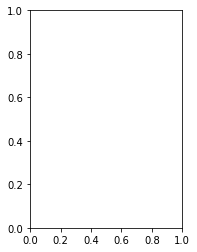

In [21]:
plt.subplot(1,2,1)
plt.plot(loss)

plt.subplot(1,2,2)
plt.plot(loss[20:])

In [25]:
train_data = dataset.get_training_data()

In [23]:
with torch.no_grad():
    sample, log_prob = flow.sample(800)
    sample_last = sample[-1].detach().cpu().numpy()

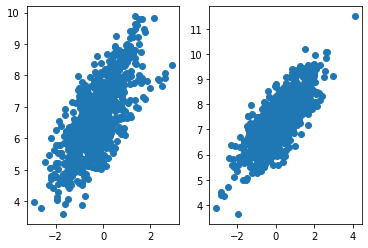

In [29]:
#xlims = (np.min(sample_last[:,0], train_data[:,0]), np.max(sample_last[:,0], train_data[:,0]))

plt.subplot(1,2,1)
plt.scatter(sample_last[:,0], sample_last[:,1])
#plt.xlim(-1,9)
#plt.ylim(-1,9)

plt.subplot(1,2,2)
plt.scatter(train_data[:,0].to('cpu'), train_data[:,1].to('cpu'))
#plt.xlim(-1,9)
#plt.ylim(-1,9)

In [30]:
log_prob_target = dataset.evaluate(sample[-1])
torch.mean(torch.abs(log_prob_target - log_prob))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [31]:
with torch.no_grad():
    z_train, log_prob_train = flow.evaluate(train_data)

In [ ]:
log_prob_train_target = dataset.evaluate(train_data)

In [ ]:
torch.mean(torch.abs(log_prob_train_target-log_prob_train))

In [ ]:
torch.mean(log_prob_train), torch.mean(log_prob_train_target)

In [ ]:
test_data = dataset.get_test_data()

In [ ]:
with torch.no_grad():
    z_train, log_prob_test = flow.evaluate(test_data)

In [ ]:
log_prob_test_target = dataset.evaluate(test_data)

In [ ]:
torch.mean(torch.abs(log_prob_test_target-log_prob_test))

In [ ]:
torch.mean(log_prob_test), torch.mean(log_prob_test_target)

In [ ]:
log_lik, mean = log_likelihood(train_data, flow)

In [ ]:
log_lik_diff, mean_diff = difference_loglik(train_data, dataset, flow)

In [ ]:
log_lik_diff, mean_diff